In [ ]:
#!pip install umap-learn

In [ ]:
#!pip install tslearn

In [ ]:
#!pip install pymorphy2

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fake_useragent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 12.8 MB/s eta 0:00:00


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=d87ea6b8d7f5ad015abeb300871a9b1c0058c6c1b3bcbc433ea0afff62d17fb5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import BertModel, BertTokenizer
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from collections import Counter, defaultdict

import re
import string # библиотека для работы со строками
import nltk   # Natural Language Toolkit
from langdetect import detect

# загружаем библиотеку для лемматизации
#import pymorphy2 # Морфологический анализатор

#from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import silhouette_samples
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics.pairwise import cosine_similarity

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import umap
#from MulticoreTSNE import MulticoreTSNE as TSNE

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

from gensim.models import FastText
#import fasttext

from tslearn.clustering import TimeSeriesKMeans

from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import string

import requests

import threading
from threading import Thread
from time import sleep

In [ ]:
# specify GPU
device = torch.device("cuda")
print(device)

cuda


In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [ ]:
def silhouette_plot(data, labels):
  cluster_labels = np.unique(labels)
  n_clusters = cluster_labels.shape[0]

  silhouette_vals = silhouette_samples(data, labels, metric="euclidean")

  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

  c_silhouette_avg = np.mean(c_silhouette_vals)
  plt.axvline(c_silhouette_avg, color="red", linestyle="--")
  plt.yticks(yticks, cluster_labels + 1)
  plt.ylabel("Кластер")
  plt.xlabel("Коэф. силуэта")
  plt.show()

In [ ]:
def split_text(text):
    text = text.replace('«', '')
    text = text.replace('»', '')
    text = text.replace('"', '')
    text = text.replace('-', '')

    text = text.replace('т. д.', 'т д')
    text = text.replace('т. п.', 'т п')
    text = text.replace('др.', 'др')

    text = text.replace('...,', ',')
    text = text.replace('?,', ',')
    text = text.replace('!,', ',')
    text = text.replace('.,', ',')
    text = text.replace('.)', ')')
    text = text.replace(';,', ',')

    text = text.replace('....', ';')
    text = text.replace('...', ';')
    text = text.replace('..', ';')

    text = text.replace('!', ';')
    text = text.replace('!!', ';')
    text = text.replace('!!!', ';')
    text = text.replace('?', ';')
    text = text.replace('??', ';')
    text = text.replace('???', ';')
    text = text.replace('!?', ';')
    text = text.replace('?!', ';')
    text = text.replace('.', ';')
    text = text.replace(u'\xa0', u' ')

    return [txt.strip() for txt in text.split(';')]

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert, num_classes):
        super(BERT_Arch, self).__init__()
        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, num_classes)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

        #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)
        return x

In [ ]:
class CustomModel(torch.nn.Module):
    def __init__(self, bert_model_name, num_labels=2):
        super().__init__()
        self.num_labels = num_labels
        self.bert = BertModel.from_pretrained(bert_model_name, return_dict=True) #load the pretrained bert model
        self.dropout = torch.nn.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, num_labels) # add a linear layer to the bert

    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        output = self.bert(input_ids, token_type_ids, attention_mask)
        pooled_output = self.dropout(output['pooler_output'])
        logits = self.classifier(pooled_output)

        if labels is not None:
            criterion = torch.nn.BCEWithLogitsLoss()
            loss = criterion(logits, labels)
            return loss
        else:
            return logits

In [ ]:
tokenizer = BertTokenizer.from_pretrained('sberbank-ai/ruBert-base')

In [ ]:
path = 'drive/MyDrive/BERT/model_weights_val.pt'

checkpoint = torch.load(path, map_location=device)
model = checkpoint.get("model")

In [ ]:
path = 'drive/MyDrive/BERT/model_weights_pos_val.pt'

checkpoint = torch.load(path, map_location=device)
model_pos = checkpoint.get("model")

In [ ]:
path = 'drive/MyDrive/BERT/model_weights_danger_val.pt'

checkpoint = torch.load(path, map_location=device)
model_danger = checkpoint.get("model")

In [ ]:
max_seq_len = 250
# tokenize and encode sequences in the test set
test_text = []

with open("drive/MyDrive/val/Дюймовочка.txt", encoding="utf8") as rf:
    for sentence in split_text(rf.read().strip()):
        if len(sentence) <= 5: continue
        test_text.append(sentence.strip())

test_text = np.array(test_text)

tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])

In [ ]:
idx = 0
count_seq = 100
need_br = False

vectors = [0] * 8
vectors_pos = [0] * 2
danger_types = [0] * 4

count = 0

while True:
    count += 1
    next_idx = idx + count_seq
    if idx + count_seq >= len(test_seq) - 1:
        next_idx = len(test_seq)
        need_br = True
    #print(idx, next_idx)
    # get predictions for test data
    logits = None; logits_danger = None; logits_pos = None
    with torch.no_grad():
        logits = model(test_seq[idx: next_idx].to(device), test_mask[idx: next_idx].to(device))

        logits_pos = model_pos(test_seq[idx: next_idx].to(device), test_mask[idx: next_idx].to(device))

        logits_danger = model_danger(test_seq[idx: next_idx].to(device), test_mask[idx: next_idx].to(device))

    probs = (torch.nn.functional.softmax(logits, dim=1)).detach().cpu().numpy()
    for vectorId, prob in enumerate(np.mean(probs, axis=0).tolist()):
      vectors[vectorId] += prob

    probs_pos = (torch.nn.functional.softmax(logits_pos, dim=1)).detach().cpu().numpy()
    for posId, prob in enumerate(np.mean(probs_pos, axis=0).tolist()):
      vectors_pos[posId] += prob

    probs_danger = (torch.nn.functional.softmax(logits_danger, dim=1)).detach().cpu().numpy()
    for typeId, prob in enumerate(np.mean(probs_danger, axis=0).tolist()):
      danger_types[typeId] += prob

    idx += count_seq
    if need_br: break

vectors = np.array(vectors) / count
vectors_pos = np.array(vectors_pos) / count
danger_types = np.array(danger_types) / count

In [ ]:
vectors_header = ("brown", "black", "red", "orange", "yellow", "green", "blue", "purple")
danger_header = ("type1", "type2", "type3", "type4")

for vectorId in range(8):
    print(vectors_header[vectorId], vectors[vectorId])

print('')
for typeId in range(4):

    print(danger_header[typeId], danger_types[typeId])
print('')

print('positive: {}, negative - {}'.format(vectors_pos[0], vectors_pos[1]))

brown 0.0991839940349261
black 0.13222546875476837
red 0.09467283139626186
orange 0.13157561421394348
yellow 0.12287257860104243
green 0.22463017205397287
blue 0.09757570177316666
purple 0.09726360688606898

type1 0.205142542719841
type2 0.1615004042784373
type3 0.07778557886679967
type4 0.5555713971455892

positive: 0.5023113886515299, negative - 0.49768858154614765


**Опасные типы личности**

**Проверка моделей на текстовых данных разных тем.**

In [ ]:
def getPageLinks(keyword, page_number):
    # Запрашиваем данные
    response = requests.get('https://www.labirint.ru/search/' + keyword + '/',
                            params={'page': page_number},
                            headers={'User-Agent': UserAgent().chrome})

    if not response.ok: return [ (keyword, '') ]

    # Получаем содержимое страницы и переводим в суп
    soup = BeautifulSoup(response.content,'html.parser')

    #print(soup.prettify())

    div = soup.find('div')

    # Находим ссылки
    list_div = div.findAll('div', attrs={'class': 'product need-watch'})

    links = [ (keyword, 'https://www.labirint.ru' + div.find('a', attrs={'class': 'cover'}).attrs['href']) for div in list_div]

    return links

In [ ]:
def getDescription(link):
    # Запрашиваем данные
    response = requests.get(link, headers={'User-Agent': UserAgent().chrome})

    if not response.ok: return ''

    # Получаем содержимое страницы
    soup = BeautifulSoup(response.content,'html.parser')

    # Описание книги (фильма)
    annotation = soup.find('div', attrs={'id': 'fullannotation'})

    if annotation == None: return ''

    return ' '.join([s for s in annotation.p.stripped_strings])

**Скачиваем с сайта “labirint.ru” описания книг по 3-м темам.**

In [ ]:
kwords = ['кулинар', 'художник', 'бизнес'] #['ужас', 'любовь']
# Находим ссылки всех страниц
links = []
for kword in kwords:
  for page_num in range(1, 20, 1):
    links_ = getPageLinks(kword, page_num)
    if len(links_) == 0: break
    sleep(0.01)
    links += links_

links = list(set(links))   # Удаляем повторяющиеся, если есть

In [ ]:
links[: 10]

[('художник', 'https://www.labirint.ru/books/274288/'),
 ('кулинар', 'https://www.labirint.ru/books/852222/'),
 ('художник', 'https://www.labirint.ru/books/557998/'),
 ('художник', 'https://www.labirint.ru/books/841583/'),
 ('бизнес', 'https://www.labirint.ru/books/881157/'),
 ('кулинар', 'https://www.labirint.ru/books/745239/'),
 ('бизнес', 'https://www.labirint.ru/books/839109/'),
 ('художник', 'https://www.labirint.ru/books/789632/'),
 ('кулинар', 'https://www.labirint.ru/books/921381/'),
 ('бизнес', 'https://www.labirint.ru/books/932523/')]

In [ ]:
lock = threading.Lock()

In [ ]:
def build_data(links, texts, labels, idx_start, idx_end):
    for link in links[idx_start : idx_end]:
        if link[1] == '': continue
        descr = getDescription(link[1])

        lock.acquire()

        labels.append(link[0])
        texts.append(descr)

        lock.release()

        sleep(0.01)

In [ ]:
texts = []; labels = []

count = len(links) // 10             # Разбиваем чтение данных на 10 + 1 потоков

cur_count = 0
for idx in range(count, len(links), count):
    cur_count = idx
    th = Thread(target=build_data, args=(links, texts, labels, idx - count, idx))
    th.start()

if cur_count != len(links):
    th = Thread(target=build_data, args=(links, texts, labels, cur_count, len(links)))
    th.start()

print('Всего ссылок: ', len(links))

while len(texts) != len(links):
  sleep(30)
  print('Прочитано ссылок: ', len(texts))

Всего ссылок:  2996
Прочитано ссылок:  89
Прочитано ссылок:  179
Прочитано ссылок:  276
Прочитано ссылок:  370
Прочитано ссылок:  469
Прочитано ссылок:  563
Прочитано ссылок:  653
Прочитано ссылок:  747
Прочитано ссылок:  843
Прочитано ссылок:  937
Прочитано ссылок:  1032
Прочитано ссылок:  1121
Прочитано ссылок:  1208
Прочитано ссылок:  1292
Прочитано ссылок:  1378
Прочитано ссылок:  1467
Прочитано ссылок:  1565
Прочитано ссылок:  1657
Прочитано ссылок:  1749
Прочитано ссылок:  1838
Прочитано ссылок:  1930
Прочитано ссылок:  2022
Прочитано ссылок:  2115
Прочитано ссылок:  2206
Прочитано ссылок:  2294
Прочитано ссылок:  2379
Прочитано ссылок:  2468
Прочитано ссылок:  2561
Прочитано ссылок:  2654
Прочитано ссылок:  2749
Прочитано ссылок:  2843
Прочитано ссылок:  2936
Прочитано ссылок:  2992
Прочитано ссылок:  2996


In [ ]:
# Удаляем данные без описания и не русский текст
print('Кол-во ссылок: ', len(texts))

texts_ = texts[:]
labels_ = labels[:]

texts = []; labels = []

for idx, text in enumerate(texts_):
   if text == '': continue
   if detect(text) != 'ru': continue
   texts.append(text)
   labels.append(labels_[idx])

texts = np.array(texts)

print('Кол-во ссылок с данными: ', len(texts))

Кол-во ссылок:  2996
Кол-во ссылок с данными:  838


In [ ]:
# Преобразуем тестовые метки в числовые
labels = np.array(labels)
for kword in kwords:
    labels[labels == kword] = kwords.index(kword)
labels = labels.astype(np.int8)

np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int8), array([200, 265, 373]))

In [ ]:
texts[:5]

array(['Когда-нибудь историки кулинарии назовут наше время эпохой расцвета кондитерского искусства. Не будем с ними спорить, это действительно так. Доступность новейших ингредиентов, высокотехнологичного инвентаря, техники с уникальными возможностями - все это стало толчком к невиданному ранее интересу к кондитерскому делу не только как к профессии и бизнесу, но и как к одному из способов творческой самореализации. "Кондитерская витрина" - это не просто книга рецептов. В ней соединены два направления, которые на современном рынке уже не могут существовать отдельно друг от друга, - бизнес и гастрономия. Сегодняшний кондитер, шеф-повар, бармен, бариста, гастроэнтузиаст, если хочет добиться успеха, должен понимать, не только как создать качественный и желательно уникальный продукт. Ему необходимо знать алгоритм работы бизнес-модели, в которую он будет интегрировать свою творческую идею, чтобы потом без потерь управлять спросом и ассортиментом, продуктом и технологиями, персоналом и аутсор

In [ ]:
labels[:15]

array([2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2], dtype=int8)

**Переводим текстовые описания книг в вектора личности, используя построенные модели многоклассовой классификации и регрессии на основе значений векторов, вычисленных предобученной моделью WordToVec.**

In [ ]:
arr_vectors = []

for text in texts:
    tokens_test = tokenizer.batch_encode_plus(
        split_text(text),
        max_length = 300,
        pad_to_max_length=True,
        truncation=True,
        return_token_type_ids=False
    )

    # for test set
    test_seq = torch.tensor(tokens_test['input_ids'])
    test_mask = torch.tensor(tokens_test['attention_mask'])

    logits = None; logits_danger = None; logits_pos = None

    with torch.no_grad():
        logits = model(test_seq.to(device), test_mask.to(device))

        logits_pos = model_pos(test_seq.to(device), test_mask.to(device))

        #logits_danger = model_danger(test_seq.to(device), test_mask.to(device))

    probs = (torch.nn.functional.softmax(logits, dim=1)).detach().cpu().numpy()
    #arr_vectors.append(np.mean(probs, axis=0))

    probs_pos = (torch.nn.functional.softmax(logits_pos, dim=1)).detach().cpu().numpy()
    #arr_vectors.append(np.mean(probs_pos, axis=0))

    #probs_danger = (torch.nn.functional.softmax(logits_danger, dim=1)).detach().cpu().numpy()
    #arr_vectors.append(np.mean(probs_danger, axis=0))

    arr_vectors.append(np.mean(probs, axis=0).tolist() + [np.mean(probs_pos, axis=0).tolist()[0]])

arr_vectors = np.array(arr_vectors)

**Графики отображения векторов личности и позитивности векторов в двумерное пространство.**

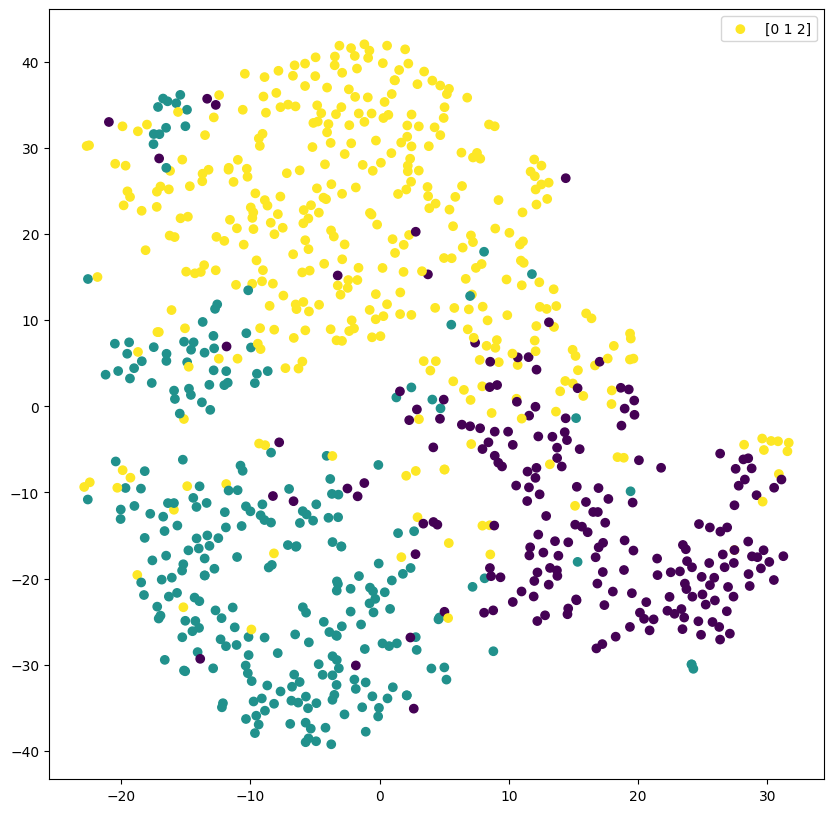

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]

#pca = PCA(n_components=2)
#embedding = pca.fit_transform(arr_vectors)

##reducer = umap.UMAP(n_components=2, random_state=42)
#embedding = reducer.fit_transform(arr_vectors)

tsne = TSNE(n_components=2, learning_rate='auto', init='random')
embedding = tsne.fit_transform(arr_vectors)

plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', label=np.unique(labels))
plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]

In [ ]:
dbs = DBSCAN(eps=0.15, min_samples=4, metric="euclidean")

y_pred = dbs.fit_predict(arr_vectors)

In [ ]:
np.unique(y_pred, return_counts=True)

(array([-1,  0]), array([ 11, 827]))

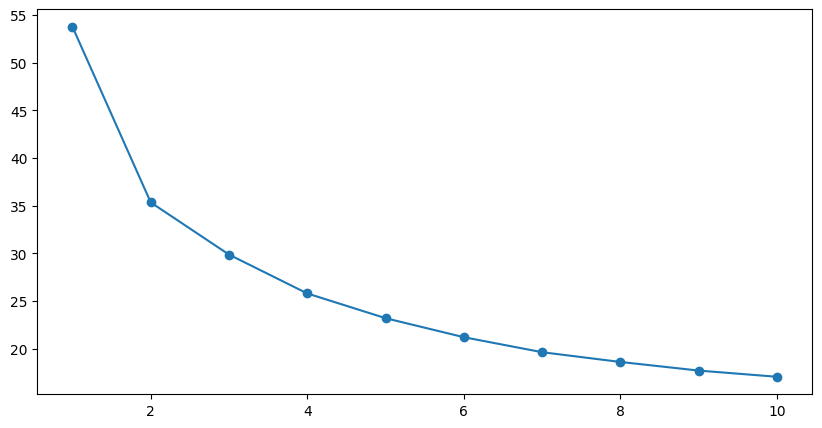

In [ ]:
distortions = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init=20, max_iter=300, random_state=0)

  kmeans.fit(arr_vectors)

  distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.show()

In [ ]:
n_clusters = 3

In [ ]:
#km = KMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=0)
#y_pred = km.fit_predict(arr_vectors)

ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=0, metric="euclidean")
y_pred = ts_kmeans.fit_predict(arr_vectors)


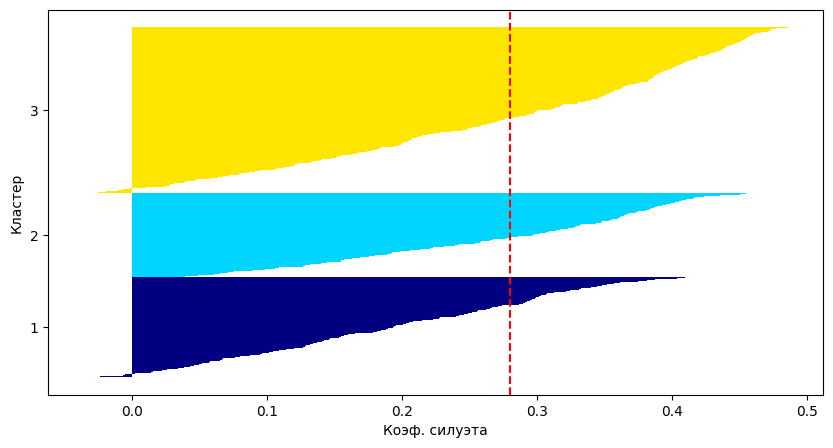

In [ ]:
silhouette_plot(arr_vectors, y_pred)

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2]), array([239, 202, 397]))

**Графики векторов и текстовые описания книг в каждом кластере (600 символов описания книги).**

Кластер 1


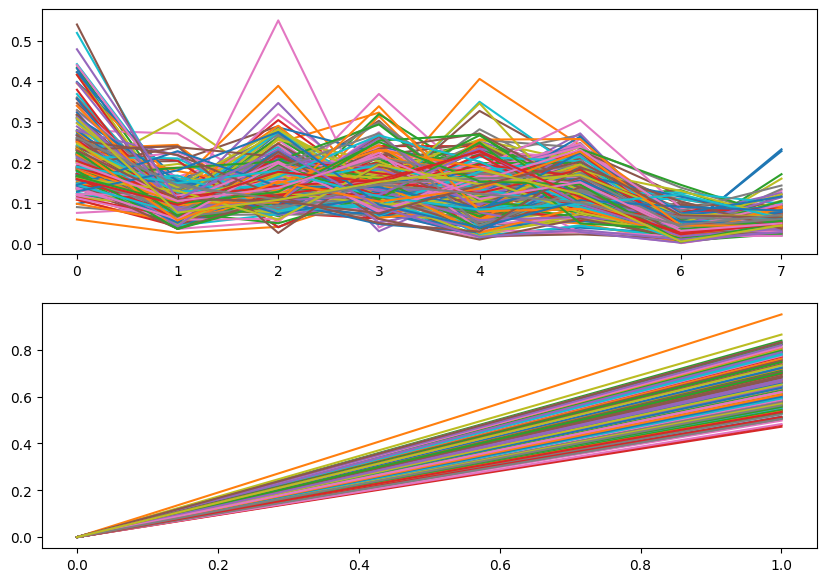

График векторов личности
Истинные метки:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Предсказанные метки:
 [0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1 2 0 0 0 1 0 0
 0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0
 0 0 1 0 2 0 0 1 0 2 0 2 0 0 0 2 0 1 1 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
accuracy - 0.82 

Попробуй счастье на вкус! Кулинарная магия от Наташи Давыдовой: 90 уникальных рецептов, которые помогут 

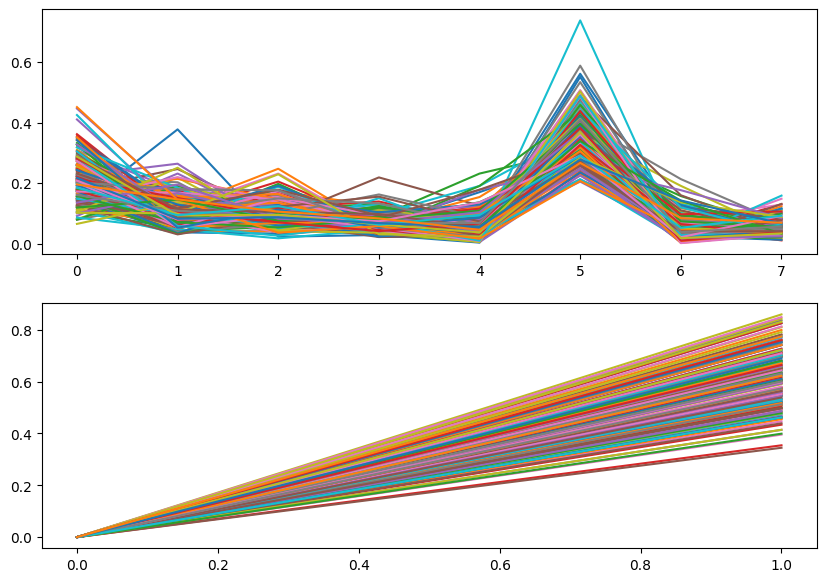

График векторов личности
Истинные метки:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Предсказанные метки:
 [1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 0 1 1 1 1 2 1 1 1 1 2 1 2 1 1
 1 2 1 2 1 2 1 0 1 1 1 0 1 2 2 1 2 1 2 1 1 1 1 0 2 1 1 1 2 1 2 1 1 1 1 1 1
 0 2 1 2 2 2 1 1 1 1 1 2 2 1 1 2 2 1 2 0 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2
 1 0 1 1 1 1 2 0 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 0 1 1 1 1 1 1 1 1 2 1 1
 0 2 2 2 1 1 1 1 2 1 1 1 1 0 1 2 2 1 1 2 1 1 1 1 2 1 1 0 1 1 1 1 1 2 1 0 1
 1 1 0 1 1 1 0 1 1 1 1

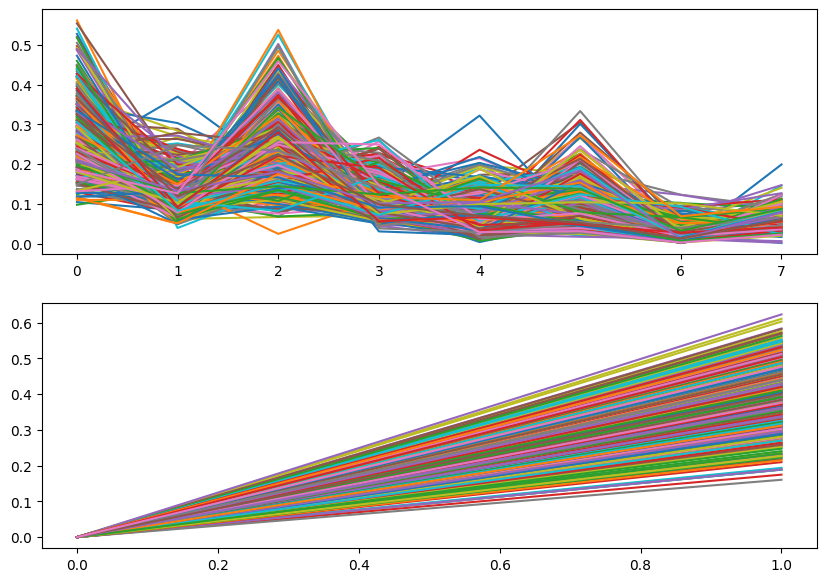

График векторов личности
Истинные метки:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
Предсказанные метки:
 [0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 0 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 2 0 2 2
 2 2 2 0 2 2 2 2 2 2 2 1 2 2

In [ ]:
indexes = [0, 1, 2] # Индексы соответствия идентиф. вектора в кластере и идентиф. вектора в исходных данных

labels_ = labels.copy()
for cluster_id in range(n_clusters):
    print('Кластер ' + str(cluster_id + 1))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    for vectors in arr_vectors[ np.where(y_pred == cluster_id)[0] ]:
        ax1.plot(vectors[:8])
        ax2.plot([0, vectors[8]])
    plt.show()
    print('График векторов личности')

    idxs = np.where(labels == indexes[cluster_id])[0]

    y_true_cluster = labels[idxs]                # Истинные метки
    y_true_cluster[:] = cluster_id
    print('Истинные метки:\n', y_true_cluster)
    y_pred_cluster = y_pred[idxs]                # Предсказанные метки
    print('Предсказанные метки:\n', y_pred_cluster)
    labels_[idxs] = cluster_id

    accuracy = accuracy_score(y_true_cluster, y_pred_cluster)
    print('accuracy -', accuracy, '\n')

    df_data = pd.DataFrame(texts[idxs], columns=['text'])
    for data in df_data.values[: 7]:
        print(data[0][:200])
        print(data[0][200:400])
        print(data[0][400:600], '\n')

print('Accuracy:', accuracy_score(y_pred, labels_))

Кратко из книги В.К. Толкачева:

Зеленый вектор:
Настоящая реальность — это мир яркого света. Отсюда театральность, яркость, демонстративность в поведении визуального типа, некоторый драматизм и острота всех его переживаний, ибо это «первичные» переживания, связанные с пересечением некоторой новой границы в восприятии. В дальнейшем для этого визуального типа становятся бессознательно желанными просто вспышки света, новое, неожиданное сочетание красок, цветов, оттенков, того, что видится, чем можно наслаждаться вновь и вновь, что придает жизни яркость ощущений.

Красный вектор:
Вечный «искатель приключений и завоеватель». Он раб идеи. Его путь к признанию проложен через осуществление чего-нибудь совершенно грандиозного и уникального, например, через восхождение на самую высокую гору или пересечение океана на плоту без весел и со связанными руками. Такое свершение, по его мнению, затмит всех претендентов на первое место. Он уверен, что всегда добьется аплодисментов, если дольше всех продержится на верхушке флагштока, или станет первым европейцем, который ступил на какую нибудь землю, или пройдет над водопадом по натянутой веревке. Все эти деяния выглядят очень заманчиво, но, конечно, до тех пор, пока они не достигнуты, и искатель приключений вдруг обнаруживает, что покорение очередной вершины ему ничего не дало. Тогда он изобретает себе новый достойный подвиг, который станет пропуском в вечность.

Оранжевый вектор: Самодисциплина для него не в тягость, в комнате на стене висит режим дня. Дисциплина становится для него психически прирожденным фактором; самоистязание себя дисциплиной — это тоже один из способов существования в этой жизни. План, режим — залог успеха! Моего и, следовательно, Вашего. Ослушаться его невозможно! Зачастую им характерен подвиг великомучеников, подвиг самоотречения. Латентный мазохизм делает их сверхисполнительными, готовыми «разбить лоб» ради исполнения долга. Для них актуально понятие «нести свой крест».

Синий вектор:
Он слышит ритмику слова. Речь, ритмически законченная, становится необходимой формой существования. Он — звуковик, поэт, организм которого не может нормально функционировать без поэзии. Он пишет стихи не для нас, а для себя. Вдохновение приходит не всегда, но его можно достичь искусственно, например, съев мухомор. Надо привести себя в необычное биохимическое состояние, и тогда стихи появятся сами собой.
Они истинные меломаны. Только они способны оценить музыку и мир звуков во всей его полноте и многообразии. Музыка доставляет им глубокое наслаждение.

Желтый вектор:
Они — прекрасные кулинары.
Он — ест много, но разнообразно; он все пробует на вкус.
Что может быть приятнее ощущений, исходящих из переполненного вкуснятиной желудка и чувства приятной дремы, охватывающей организм? Не в этом ли смысл жизни? Качество жизни наиболее точно измеряется количеством выпитого пива!